#### Exploratory Data Analysis: Log Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/log_per_student.csv')

In [3]:
df.set_index('leaid', inplace=True)

In [4]:
df = df[['name', 'stabbr', 'agchrt', 'v33',
         'totalrev', 'tfedrev', 'tstrev', 'tlocrev', 'totalexp', 'tcurelsc', 'tcapout',
         'a11', 'a13', 't06', 't40', 'u30', 
         'v10', 'v12', 'v14', 'v18', 'v24', 'v38', 'v93',
         'v11', 'v13', 'v17', 'v37',
         'z33', 'z35', 'z36', 'z37', 'z38',
         'w01', 'w31', 'w61',
         '_19h', '_21f', '_41f', '_61v', '_66v',
         'graduation rate']]

In [5]:
num_cols = df.drop(columns=['name', 'agchrt', 'stabbr', 'v33', 'graduation rate']).columns
num_cols

Index(['totalrev', 'tfedrev', 'tstrev', 'tlocrev', 'totalexp', 'tcurelsc',
       'tcapout', 'a11', 'a13', 't06', 't40', 'u30', 'v10', 'v12', 'v14',
       'v18', 'v24', 'v38', 'v93', 'v11', 'v13', 'v17', 'v37', 'z33', 'z35',
       'z36', 'z37', 'z38', 'w01', 'w31', 'w61', '_19h', '_21f', '_41f',
       '_61v', '_66v'],
      dtype='object')

In [6]:
col_names = [
    'Total Revenue', 
    'Total Federal Revenue', 
    'Total State Revenue', 
    'Total Local Revenue',  
    'Total Expenditures', 
    'Total Elementary/Secondary Education Expenditures', 
    'Total Capital Outlay Expenditures',
    'Local Revenue - Textbook Sales and Rentals', 
    'Local Revenue - District Activity Receipts', 
    'Local Revenue - Property Taxes', 
    'Local Revenue - Individual and Corporate Income Taxes', 
    'Local Revenue - Fines and Forfeits', 
    'Employee Benefits - Instruction', 
    'Employee Beneifts - Pupil Support', 
    'Empolyee Benefits - Instructional Staff Support', 
    'Employee Benefits - School Admin. Support', 
    'Employee Benefits - Student Transportation Support', 
    'Employee Benefits - Business/Central Support', 
    'Textbooks',
    'Salaries - Pupil Support', 
    'Salaries - Instructional Staff Support', 
    'Salaries - School Admin. Support', 
    'Salaries - Business/Central Support',
    'Salaries - Instruction', 
    'Teacher Salaries (Regular Education)', 
    'Teacher Salaries (Special Education)', 
    'Teacher Salaries (Vocational)', 
    'Teacher Salaries (Other)',
    'Assets - Sinking Fund', 
    'Assets - Bond Fund', 
    'Assets - Other Funds',
    'Long Term Debt - Beginning of Year', 
    'Long Term Debt Issued', 
    'Long Term Debt - End of Year', 
    'Short Term Debt - Beginning of Year', 
    'Short Term Debt - End of Year'
]

<ipython-input-7-2a0d28e7aed8>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


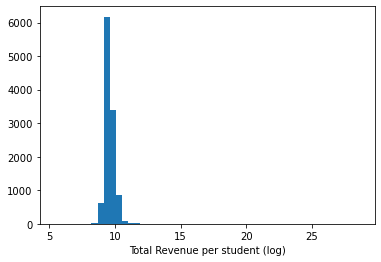

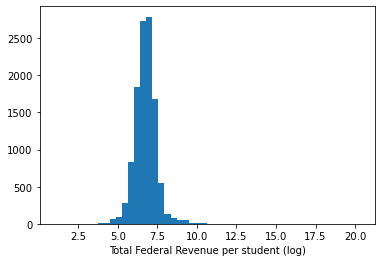

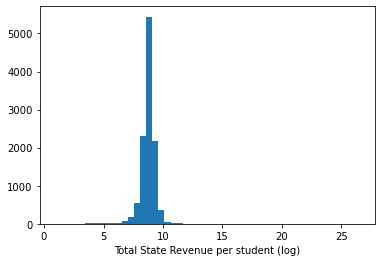

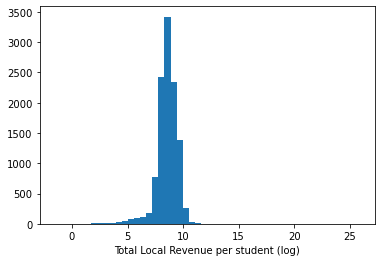

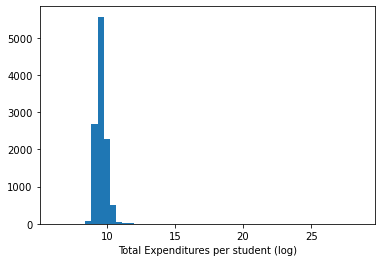

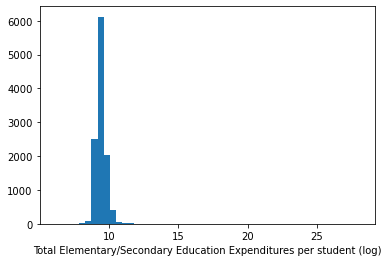

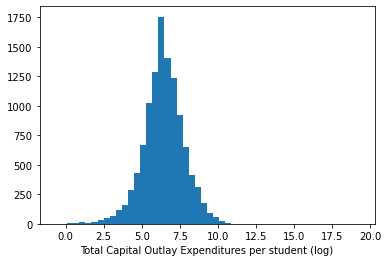

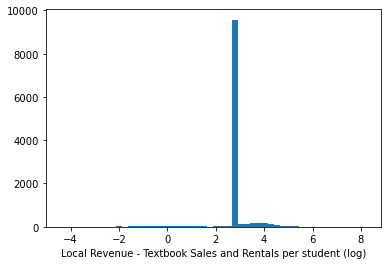

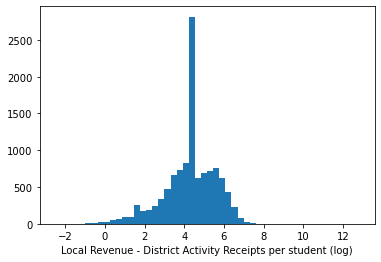

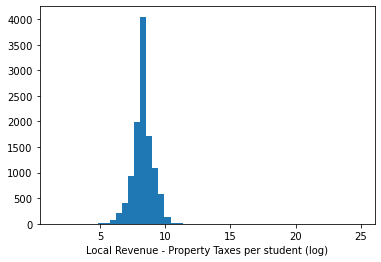

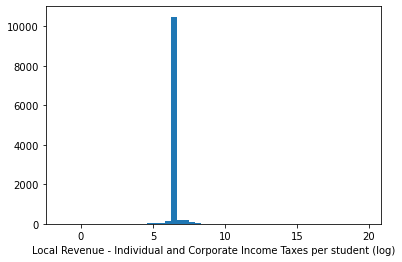

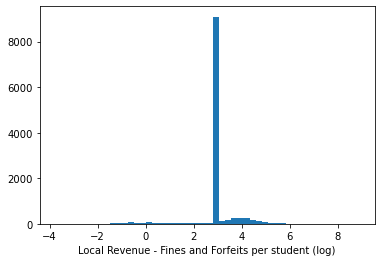

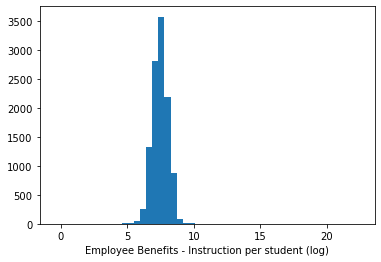

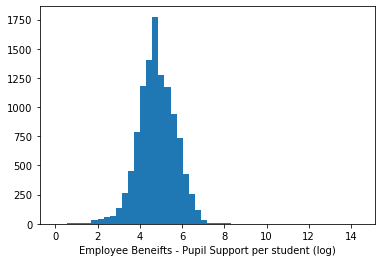

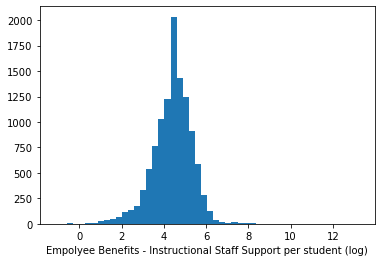

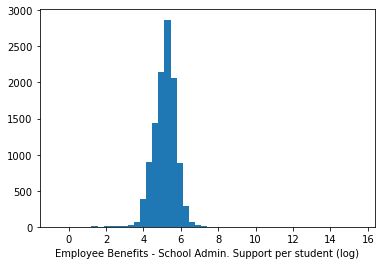

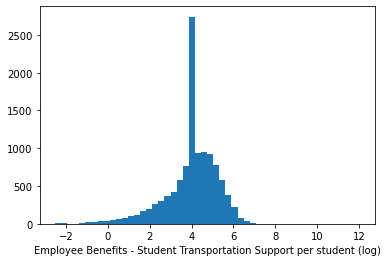

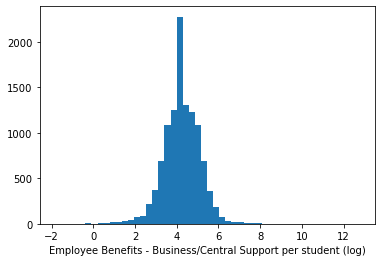

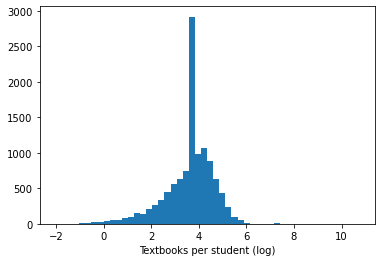

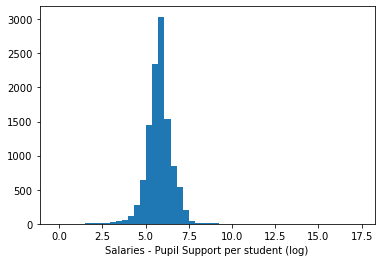

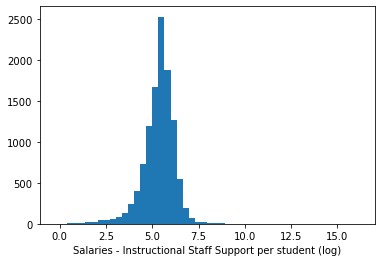

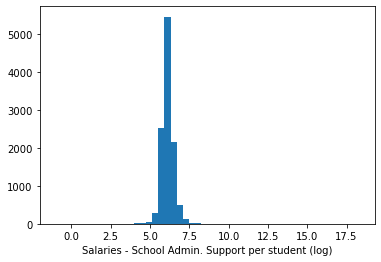

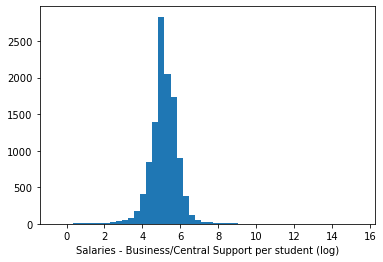

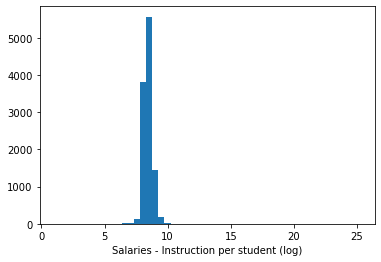

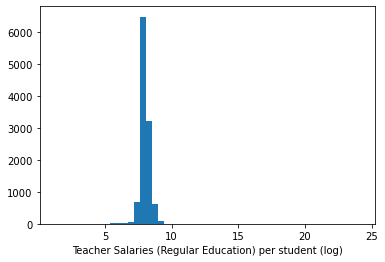

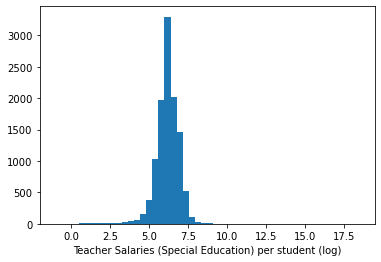

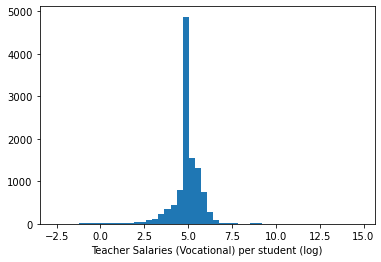

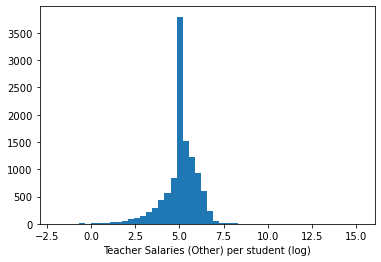

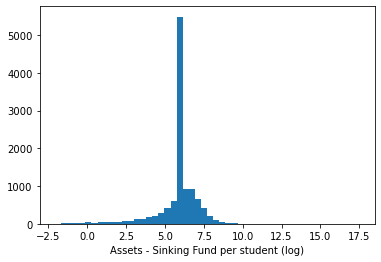

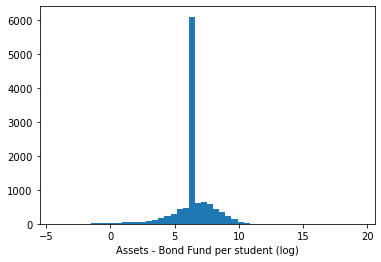

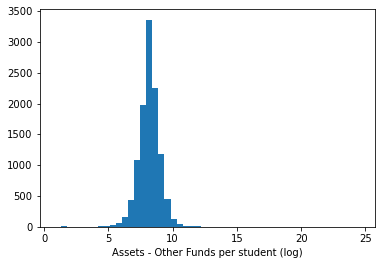

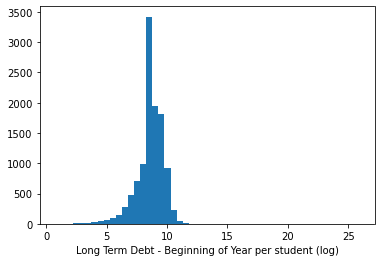

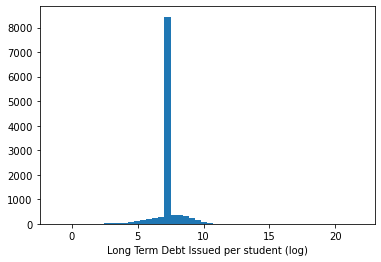

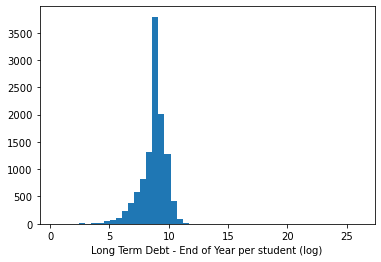

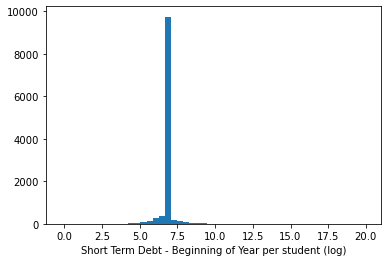

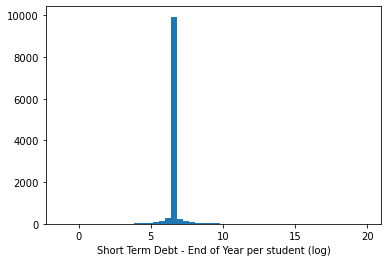

In [7]:
for col, name in zip(num_cols, col_names):
    fig, ax = plt.subplots()
    plt.hist(df[col], bins=50, range=(min(df[col]), 3*np.median(df[col])))
    plt.xlabel(name + ' per student (log)')
    fig.savefig(f'./plots/log_{col}_hist.png')

Imputing values and log-transforming the features have given approximately normal distributions, though with very small standard deviations overall. 

The distribution of the target feature:

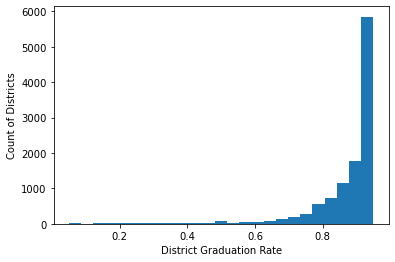

In [11]:
fig, ax = plt.subplots()
plt.hist(df['graduation rate'], bins=25)
plt.xlabel('District Graduation Rate')
plt.ylabel('Count of Districts')
plt.show()

fig.savefig(f'./plots/graduation_hist.png')

The last plots to look at will compare the numeric features with our target.

<ipython-input-9-eb3c2454a86e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


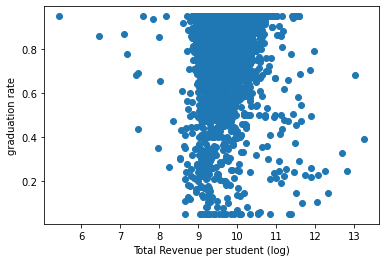

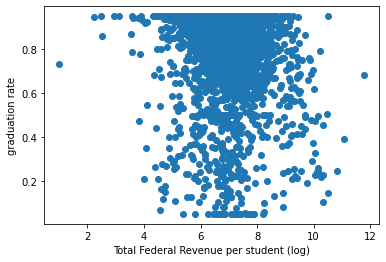

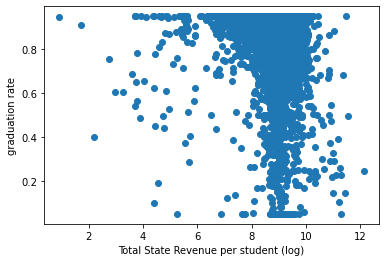

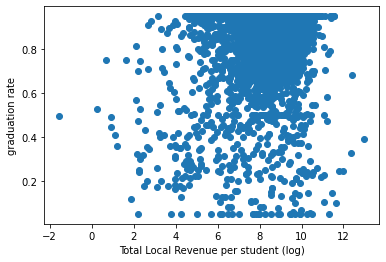

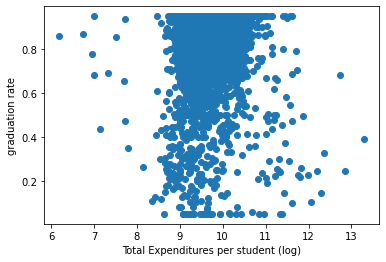

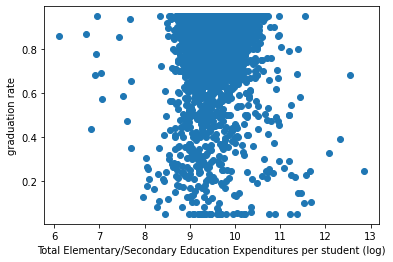

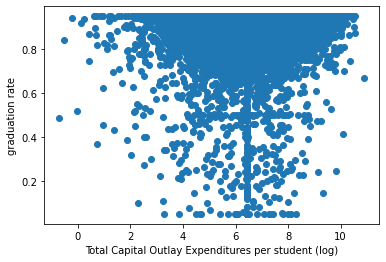

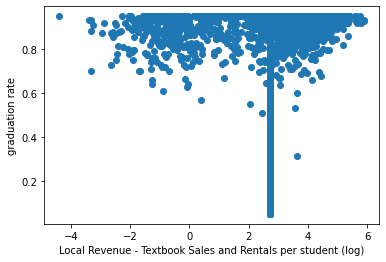

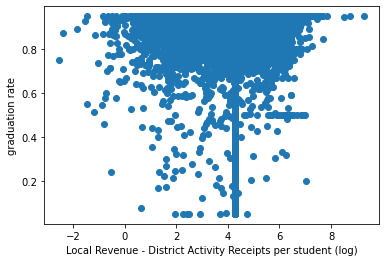

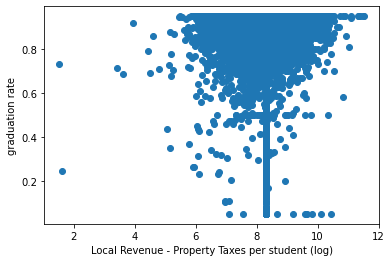

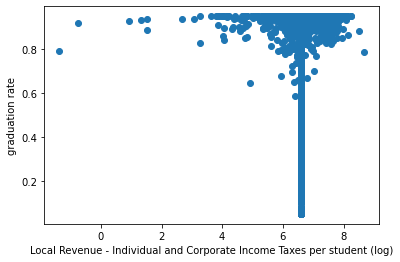

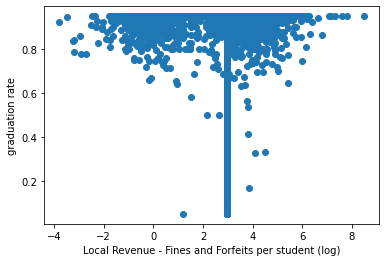

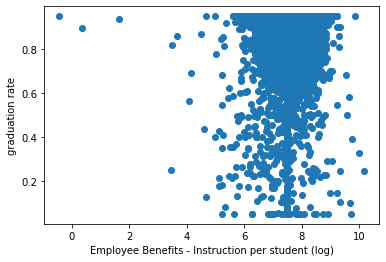

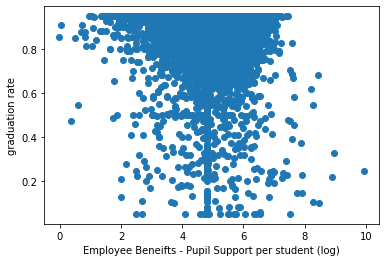

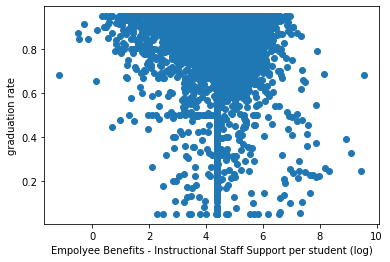

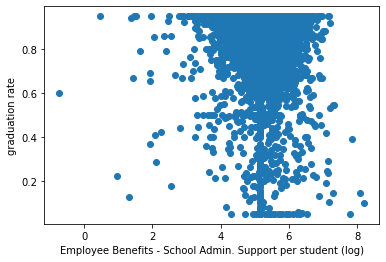

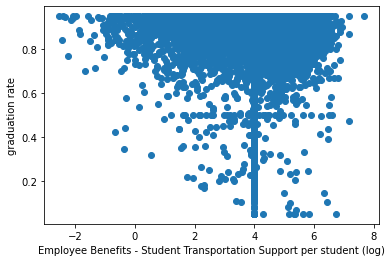

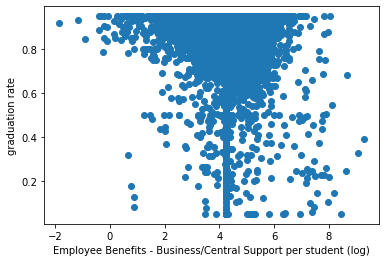

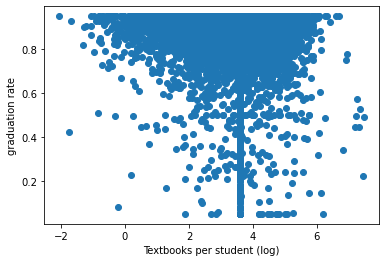

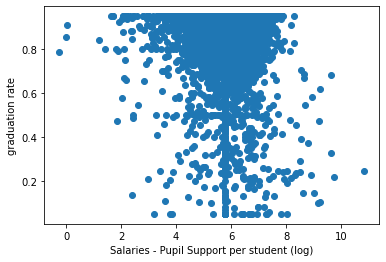

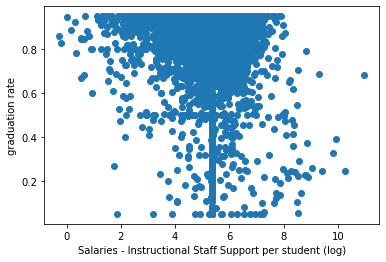

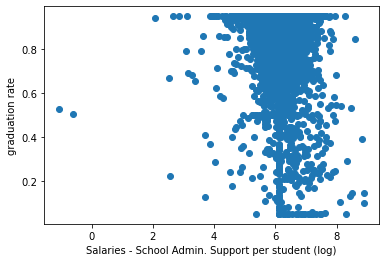

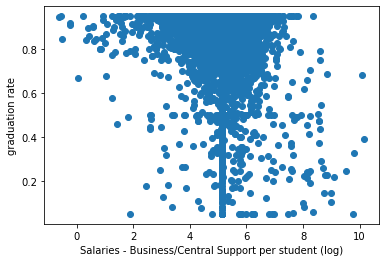

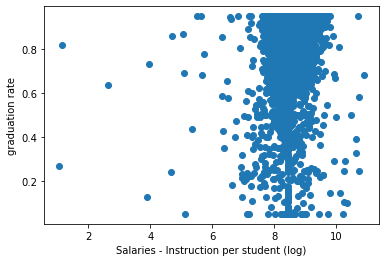

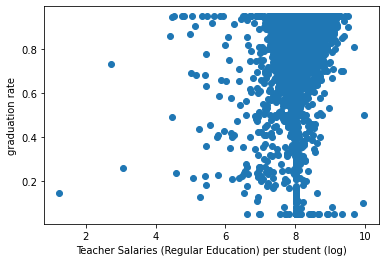

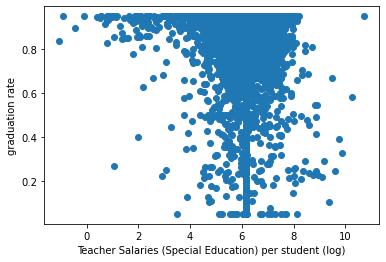

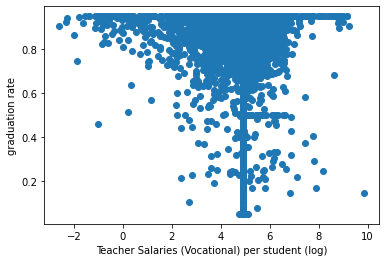

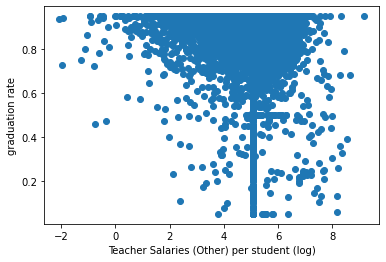

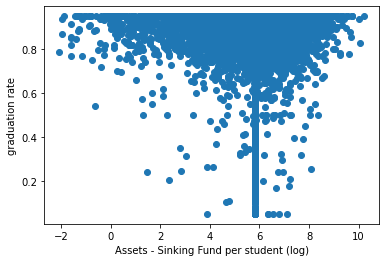

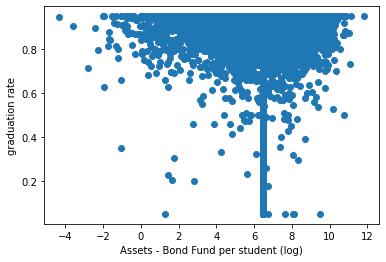

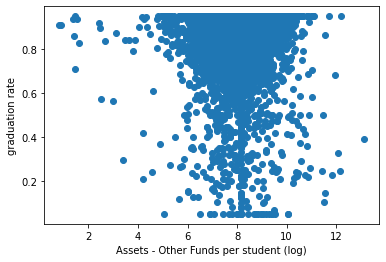

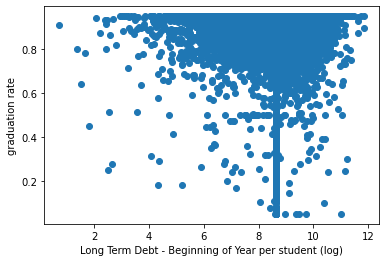

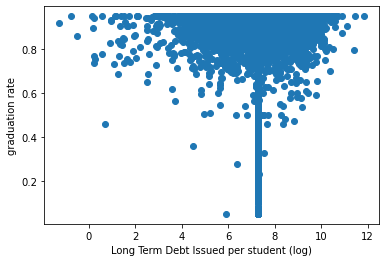

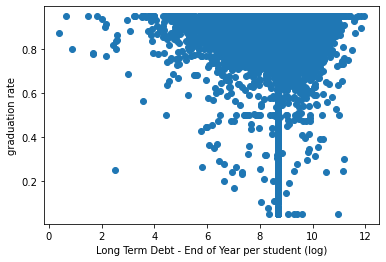

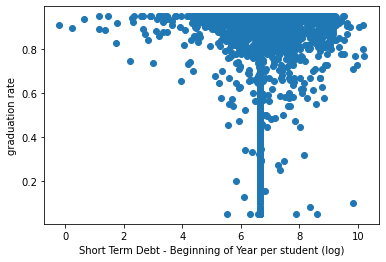

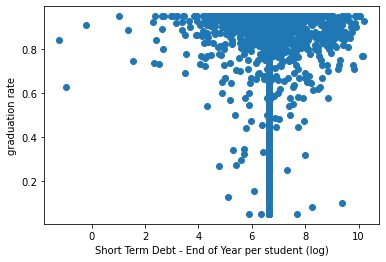

In [9]:
for col, name in zip(num_cols, col_names):
    fig, ax = plt.subplots()
    plt.scatter(x=df[col], y=df['graduation rate'])
    plt.xlabel(name + ' per student (log)')
    plt.ylabel('graduation rate')
    fig.savefig(f'./plots/log_{col}_scatter.png')

Because the target feature is mostly concentrated on just one end, there tends to be much more variance in finances among the districts with higher graduation rates.